In [136]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [137]:
import numpy as np

In [138]:
pip install -q keras

In [139]:
import keras

In [140]:
pip install -q tensorflow

In [141]:
import pandas as pd
datapath='/content/drive/My Drive/Machine Learning/Bengaluru_House_Data.csv'
data=pd.read_csv(datapath)

In [142]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [143]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [144]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [145]:
##Encode all the given data remove the null values see percentage of null values and if needed replace them with mean or max value using visualisation
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [146]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [147]:
##remove a few null values
data=data.dropna(subset=['location','size','balcony','bath'])

In [148]:
data

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [149]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
##NOW USE LABEL ENCODER TO ENCODE THE PREPROCESSED DATA
data['location_code']=lbl.fit_transform(data['location'])
data['size_code']=lbl.fit_transform(data['size'])
data['area_code']=lbl.fit_transform(data['area_type'])
data['availability_code']=lbl.fit_transform(data['availability'])
data['sqft_code']=lbl.fit_transform(data['total_sqft'])
data=data.drop('location',axis=1)
data=data.drop('size',axis=1)
data=data.drop('area_type',axis=1)
data=data.drop('availability',axis=1)
data=data.drop('total_sqft',axis=1)
data['society_code']=lbl.fit_transform(data['society'])
data.drop('society',axis=1)
import seaborn as sns
sns.set()
##sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [150]:
data['society_code']=lbl.fit_transform(data['society'])
data=data.drop('society',axis=1)

In [151]:
data.isnull().sum()

bath                 0
balcony              0
price                0
location_code        0
size_code            0
area_code            0
availability_code    0
sqft_code            0
society_code         0
dtype: int64

In [152]:
x=data.drop('price',axis=1)
y=data['price']

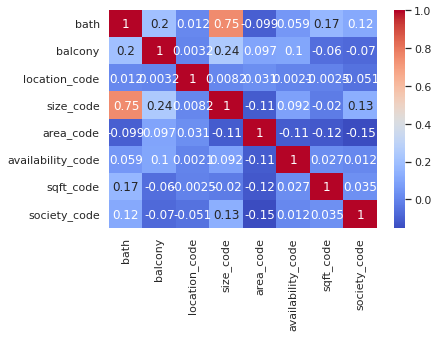

In [153]:
sns.heatmap(x.corr(),annot=True,cmap='coolwarm')

In [154]:
def correlation(dataset,threshold):
    colcorr=set()
    corr_matrix=x.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]#GETS COLUMN NAME
                colcorr.add(colname)
    return colcorr

In [156]:
correlation(x,0.8)

set()

In [174]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=45)

In [203]:
from sklearn import preprocessing
x_train=preprocessing.scale(x_train)


In [218]:
x_train=np.array(x_train)

In [219]:
y_train=np.array(y_train)

In [256]:
import tensorflow as tf
from tensorflow.keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(units=10,activation='relu',input_dim=8))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=1))


In [257]:
#define optimisers and all other hyperparameters
model.compile(optimizer='adam',loss='mean_squared_error')

In [273]:
model.fit(x_train,y_train,batch_size=1024,validation_split=0.1,epochs=100,verbose=1)

Epoch 1/100
8/8 [==============================] - 0s 10ms/step - loss: 0.5536 - val_loss: 1.2391
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5516 - val_loss: 1.2475
Epoch 3/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5506 - val_loss: 1.2457
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5492 - val_loss: 1.2395
Epoch 5/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5480 - val_loss: 1.2452
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 0.5466 - val_loss: 1.2375
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 0.5460 - val_loss: 1.2354
Epoch 8/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5442 - val_loss: 1.2360
Epoch 9/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5427 - val_loss: 1.2373
Epoch 10/100
8/8 [==============================] - 0s 5ms/step - loss: 0.5413 - val_loss: 1.2307
Epoch 11/100
8/8 [==========

In [270]:
y_pred=model.predict(x_test)